In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_excel('movies_dataset.xlsx')
df=pd.DataFrame(data)

In [88]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Although range,2551.167,2945,below_avg,Horror
1,1970,Scientist hit,7666.373,7965,average,Science Fiction
2,1970,Produce member,5519.905,1337,not_popular,Action
3,1970,Produce member,5519.905,1337,not_popular,Thriller
4,1970,Produce member,5519.905,1337,not_popular,Mystery


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       3000 non-null   datetime64[ns]
 1   Title              3000 non-null   object        
 2   Overview           3000 non-null   object        
 3   Popularity         3000 non-null   float64       
 4   Vote_Count         3000 non-null   int64         
 5   Vote_Average       3000 non-null   float64       
 6   Original_Language  3000 non-null   object        
 7   Genre              3000 non-null   object        
 8   Poster_Url         3000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 211.1+ KB


In [47]:
df['Genre'].head()

0                               Horror
1                      Science Fiction
2            Action, Thriller, Mystery
3    Science Fiction, Romance, Fantasy
4                      Comedy, Romance
Name: Genre, dtype: object

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,3000,3000.000000,3000.000000,3000.000000
mean,2020-10-14 01:21:36,5020.247564,5020.734000,5.437800
min,2015-10-21 00:00:00,100.517000,10.000000,1.000000
25%,2018-05-24 18:00:00,2614.355250,2395.750000,3.100000
50%,2020-09-12 00:00:00,5024.687000,5052.000000,5.400000
75%,2023-03-22 00:00:00,7497.548000,7644.000000,7.700000
max,2025-10-16 00:00:00,9999.362000,10000.000000,10.000000
std,NaN,2854.431812,2924.390117,2.625775


**. summary\
. we have a datafream consisting of 3000 rows and 9 columns.\
. our dataset looks a bit tidy with no Null nor duplicated values.\
. Overview , original_Language and Poster_Url wouldnot be so useful during analysis ,so we'll drop them.\
. There is noticiable outliners in popularity column\
. vote_Average better be categorised for proper analysis\
. Genre column has comma saparated values and with space that need to be handeled and casted into category.**

In [87]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtype
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Although range,2551.167,2945,below_avg,Horror
1,1970,Scientist hit,7666.373,7965,average,Science Fiction
2,1970,Produce member,5519.905,1337,not_popular,Action
3,1970,Produce member,5519.905,1337,not_popular,Thriller
4,1970,Produce member,5519.905,1337,not_popular,Mystery


Droping the column

In [51]:
cols = ['Overview','Original_Language','Poster_Url']

In [52]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [86]:
df.head()
# df.describe()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2023,Although range,2551.167,2945,below_avg,Horror
1,2020,Scientist hit,7666.373,7965,average,Science Fiction
2,2024,Produce member,5519.905,1337,not_popular,Action
3,2024,Produce member,5519.905,1337,not_popular,Thriller
4,2024,Produce member,5519.905,1337,not_popular,Mystery


# **Categorizing vote_Average column**

we would cut the Vote_Average values and make 4 categories : **Popular average below_avg notpopular** to describe it more using **catigorize_col()** function 
provide above



In [54]:
def categorize_col(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

labels = ['not_popular', 'below_avg', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['below_avg', 'average', 'not_popular', 'popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [55]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2023,Although range,2551.167,2945,below_avg,Horror
1,2020,Scientist hit,7666.373,7965,average,Science Fiction
2,2024,Produce member,5519.905,1337,not_popular,"Action, Thriller, Mystery"
3,2022,Resource where pick,5148.251,8670,popular,"Science Fiction, Romance, Fantasy"
4,2016,Question past,4625.750,8397,below_avg,"Comedy, Romance"


In [56]:
df["Vote_Average"].value_counts()

Vote_Average
average        760
below_avg      751
not_popular    734
popular        732
Name: count, dtype: int64

In [57]:
df.dropna(inplace=True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [58]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2023,Although range,2551.167,2945,below_avg,Horror
1,2020,Scientist hit,7666.373,7965,average,Science Fiction
2,2024,Produce member,5519.905,1337,not_popular,"Action, Thriller, Mystery"
3,2022,Resource where pick,5148.251,8670,popular,"Science Fiction, Romance, Fantasy"
4,2016,Question past,4625.750,8397,below_avg,"Comedy, Romance"


we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [59]:
df['Genre']= df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop =True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2023,Although range,2551.167,2945,below_avg,Horror
1,2020,Scientist hit,7666.373,7965,average,Science Fiction
2,2024,Produce member,5519.905,1337,not_popular,Action
3,2024,Produce member,5519.905,1337,not_popular,Thriller
4,2024,Produce member,5519.905,1337,not_popular,Mystery


In [60]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Drama',
                  'Fantasy', 'Horror', 'Mystery', 'Romance', 'Science Fiction',
                  'Thriller'],
, ordered=False, categories_dtype=object)

In [61]:
df.nunique()

Release_Date      11
Title           2945
Popularity      2977
Vote_Count      2613
Vote_Average       4
Genre             11
dtype: int64

Data visulization

In [62]:
sns.set_style('whitegrid')

# Q1. What is the most frequent genre of movies released on netflix ?

In [63]:
df['Genre'].describe()

count        5941
unique         11
top       Mystery
freq          580
Name: Genre, dtype: object

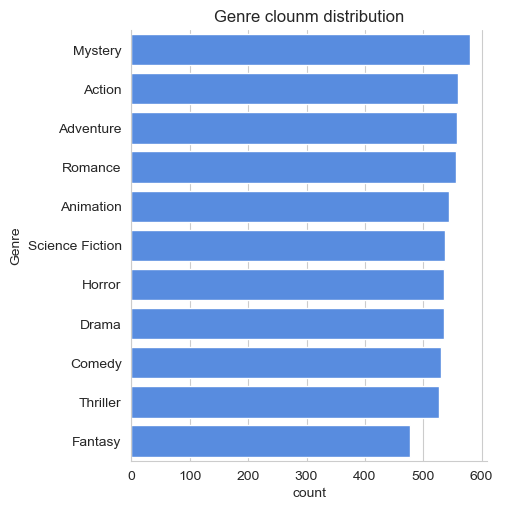

In [65]:
sns.catplot(y ='Genre', data =df , kind='count',order = df['Genre'].value_counts().index,
            color = '#4287f5')

plt.title("Genre clounm distribution")
plt.show()

# Q2. which has highest votes in vote avg column ?

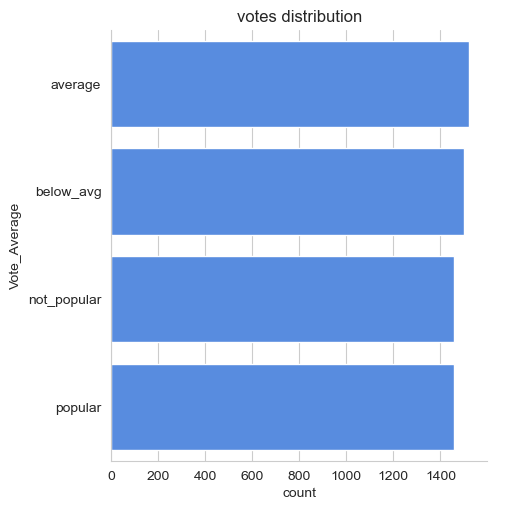

In [71]:
sns.catplot(y ='Vote_Average', data =df , kind='count',order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('votes distribution')
plt.show()

# Q3 what movie got the highest popularity ? What is its gener ?

In [73]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2023,Although range,2551.167,2945,below_avg,Horror
1,2020,Scientist hit,7666.373,7965,average,Science Fiction


In [84]:
df[df['Popularity'] == df ['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
3205,2019,Resource special already cup,9999.362,3429,not_popular,Horror


# Q4 . what movie got the lowest popularity ? What is its gener ?¶

In [79]:
df[df['Popularity'] == df ['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
2993,2020,Call ago seat,100.517,1512,not_popular,Action
2994,2020,Call ago seat,100.517,1512,not_popular,Animation


# Q5. Which year has the most filmmed movies ?

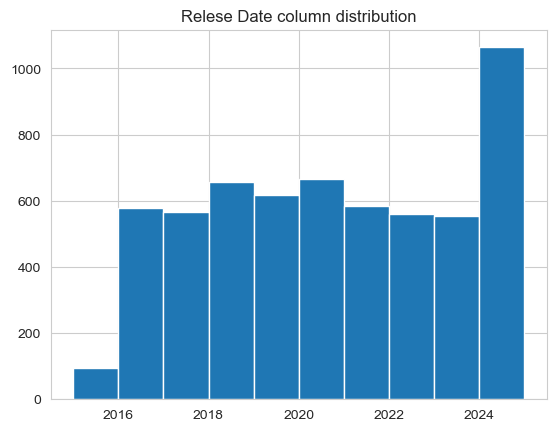

In [80]:
df['Release_Date'].hist()
plt.title('Relese Date column distribution')
plt.show()